# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**AI-Generated Content Disclaimer:** This notebook was generated by an AI and has not been fully verified. Users should exercise caution when interpreting the code or results and should verify critical sections independently.

## Overview of the Dandiset

This Dandiset contains data supporting the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State". The dataset includes in vivo calcium imaging data with supporting behavioral videos and ex vivo patch-clamp electrophysiology recordings.

You can find more information about this Dandiset on the DANDI archive: [https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

## Notebook Contents

This notebook will demonstrate how to access and explore data from Dandiset 001195 using the Dandi API and PyNWB. We will load Dandiset metadata, list assets, load a specific NWB file, examine its structure and metadata, and visualize some example data.

## Required Packages

This notebook requires the following packages to be installed:

*   `dandi`
*   `pynwb`
*   `h5py`
*   `remfile`
*   `itertools`
*   `matplotlib`
*   `numpy`


In [1]:
# Load necessary packages
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

## Loading the Dandiset using the DANDI API

We can connect to the DANDI archive and access the Dandiset using the `dandi` Python package.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## Loading an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents. We will use the file `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`.

The URL for this asset is: `https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/`

In [3]:
# Load the specific NWB file
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some high-level metadata from the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Targeted Layer: {nwb.lab_meta_data['DandiIcephysMetadata'].targeted_layer}")

Session Description: episodic stimulation
Identifier: a18b081c-3b63-45df-b702-fc3640aef3de
Session Start Time: 2015-03-24 13:41:14-07:00
Experimenter: ('Matthews, Gillian',)
Subject ID: 23
Subject Species: Mus musculus
Targeted Layer: CeA


## NWB File Contents Summary

This NWB file primarily contains intracellular electrophysiology data. Here's a summary of the main components and data streams available in this file:

*   **Intracellular Electrodes**: Information about the recording electrodes.
*   **Acquisition**: Raw recorded data series, including current clamp responses for multiple sweeps and channels.
*   **Stimulus**: Applied stimulus data series, including current clamp stimuli for multiple sweeps and channels.
*   **Devices**: Information about the recording device.
*   **LabMetaData**: Additional metadata, including cell and slice IDs and targeted/inferred layers.
*   **Subject**: Information about the experimental subject (mouse).
*   **Intracellular Recordings Table**: Table linking stimulus and response from a single electrode.
*   **Simultaneous Recordings Table**: Table grouping intracellular recordings from the IntracellularRecordingsTable.
*   **Sequential Recordings Table**: Table grouping simultaneous recordings.

The `acquisition` and `stimulus` groups contain `CurrentClampSeries` objects with measured voltage responses and applied current stimuli, respectively. These are organized by sweep number (e.g., `current_clamp-response-01-ch-0`) and channel (ch-0 and ch-1).

## Explore this NWB File on Neurosift

You can also explore this NWB file interactively on Neurosift using the following link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=0.250408.1733](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=0.250408.1733)


## Visualizing Intracellular Electrophysiology Data

Let's visualize some of the recorded voltage responses and applied stimuli from the `acquisition` and `stimulus` sections. We will plot the data from the first sweep (index 01) for both channels (ch-0 and ch-1).

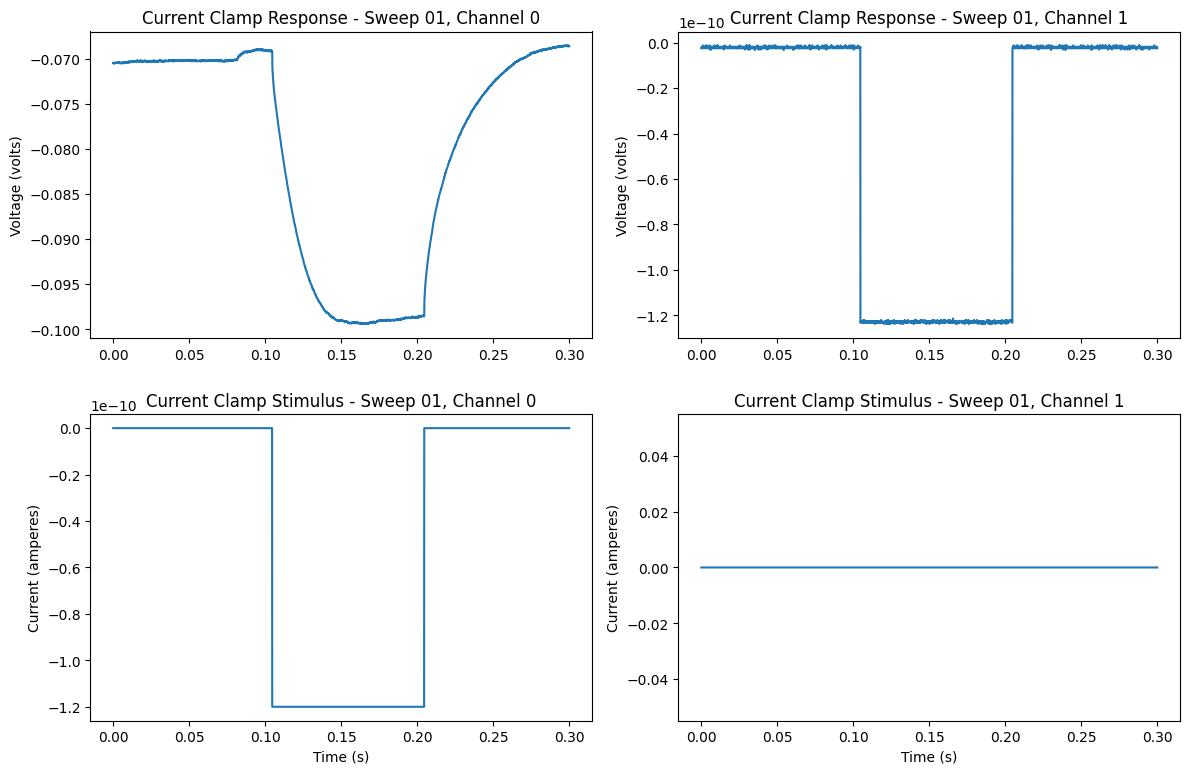

In [4]:
# Get the data from the first sweep (01)
response_ch0 = nwb.acquisition['current_clamp-response-01-ch-0']
stimulus_ch0 = nwb.stimulus['stimulus-01-ch-0']
response_ch1 = nwb.acquisition['current_clamp-response-01-ch-1']
stimulus_ch1 = nwb.stimulus['stimulus-01-ch-1']

# Extract data and time
# We'll take a subset of the data for visualization to avoid excessive memory usage
subset_size = 3000 # The shape of the dataset is (3000,) so we'll take all of it

# Generate time vector based on starting time and rate
rate = response_ch0.rate
starting_time = response_ch0.starting_time
time = np.arange(subset_size) / rate + starting_time

response_data_ch0 = response_ch0.data[:][:subset_size] * response_ch0.conversion
stimulus_data_ch0 = stimulus_ch0.data[:][:subset_size] * stimulus_ch0.conversion
response_data_ch1 = response_ch1.data[:][:subset_size] * response_ch1.conversion
stimulus_data_ch1 = stimulus_ch1.data[:][:subset_size] * stimulus_ch1.conversion

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(time, response_data_ch0)
axes[0, 0].set_ylabel(f'Voltage ({response_ch0.unit})')
axes[0, 0].set_title('Current Clamp Response - Sweep 01, Channel 0')

axes[1, 0].plot(time, stimulus_data_ch0)
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel(f'Current ({stimulus_ch0.unit})')
axes[1, 0].set_title('Current Clamp Stimulus - Sweep 01, Channel 0')

axes[0, 1].plot(time, response_data_ch1)
axes[0, 1].set_ylabel(f'Voltage ({response_ch1.unit})')
axes[0, 1].set_title('Current Clamp Response - Sweep 01, Channel 1')

axes[1, 1].plot(time, stimulus_data_ch1)
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel(f'Current ({stimulus_ch1.unit})')
axes[1, 1].set_title('Current Clamp Stimulus - Sweep 01, Channel 1')

plt.tight_layout()
plt.show()

## Visualizing Multiple Sweeps

We can also plot responses from several sweeps to see how the cell responds to different stimulus levels. Let's plot the voltage responses for sweep 01, 05, and 10 from channel 0.

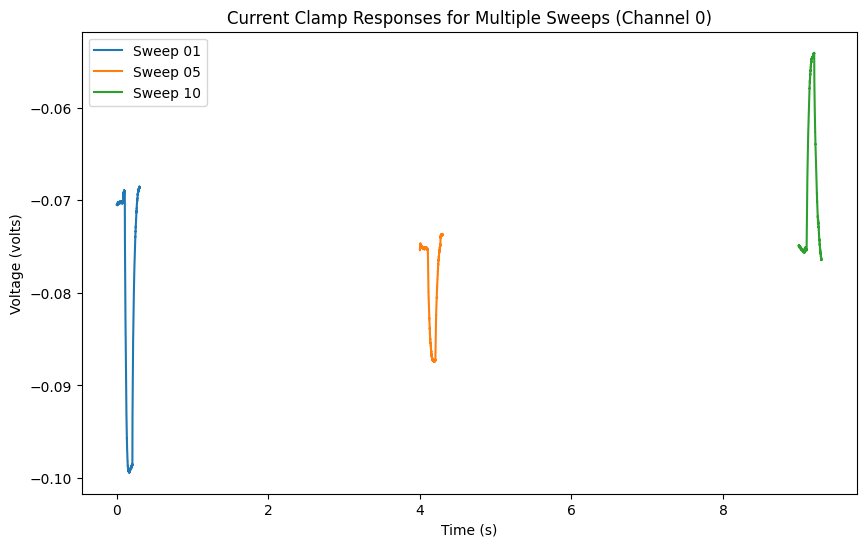

In [5]:
# Get data from multiple sweeps for channel 0
sweeps_to_plot = ["01", "05", "10"]
sweep_data = {}

for sweep_num in sweeps_to_plot:
    response_key = f'current_clamp-response-{sweep_num}-ch-0'
    if response_key in nwb.acquisition:
        response = nwb.acquisition[response_key]
        rate = response.rate
        starting_time = response.starting_time
        subset_size = 3000 # Using the known size of the dataset
        time = np.arange(subset_size) / rate + starting_time
        response_data = response.data[:][:subset_size] * response.conversion
        sweep_data[sweep_num] = {"time": time, "data": response_data, "unit": response.unit}
    else:
        print(f"Warning: {response_key} not found in acquisition.")


# Plot the responses from different sweeps
plt.figure(figsize=(10, 6))

for sweep_num, data in sweep_data.items():
    plt.plot(data["time"], data["data"], label=f'Sweep {sweep_num}')

plt.xlabel('Time (s)')
plt.ylabel(f'Voltage ({list(sweep_data.values())[0]["unit"] if sweep_data else "Unknown Unit"})')
plt.title('Current Clamp Responses for Multiple Sweeps (Channel 0)')
plt.legend()
plt.show()

## Summary and Future Directions

This notebook provided a basic introduction to exploring Dandiset 001195, focusing on loading Dandiset information and accessing intracellular electrophysiology data from a representative NWB file. We demonstrated how to load the data using the Dandi API and PyNWB and visualized some example voltage responses and stimuli.

For future analysis, researchers could:

*   Explore other NWB files in the Dandiset, including calcium imaging and behavioral video data.
*   Perform more in-depth analysis of the electrophysiology data, such as calculating resting membrane potential, input resistance, and action potential properties.
*   Integrate electrophysiology data with behavioral data to investigate neural correlates of behavior.
*   Analyze the calcium imaging data to study the activity of dorsal raphe dopamine neurons.
*   Compare data across different subjects and experimental conditions within the Dandiset.

This notebook serves as a starting point for further exploration and analysis of this rich dataset.
